#Roshan Kumar Yadav
#21070126130
#AIML B3

## Importing Required Libraries

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Importing the Given Dataset

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data", header = None, names = ['Class', 'Alcohol','Malic Acid', 'Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline'])
df.head()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Description

In [4]:
df.dtypes

Class                             int64
Alcohol                         float64
Malic Acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [5]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
df.describe()

,Class,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


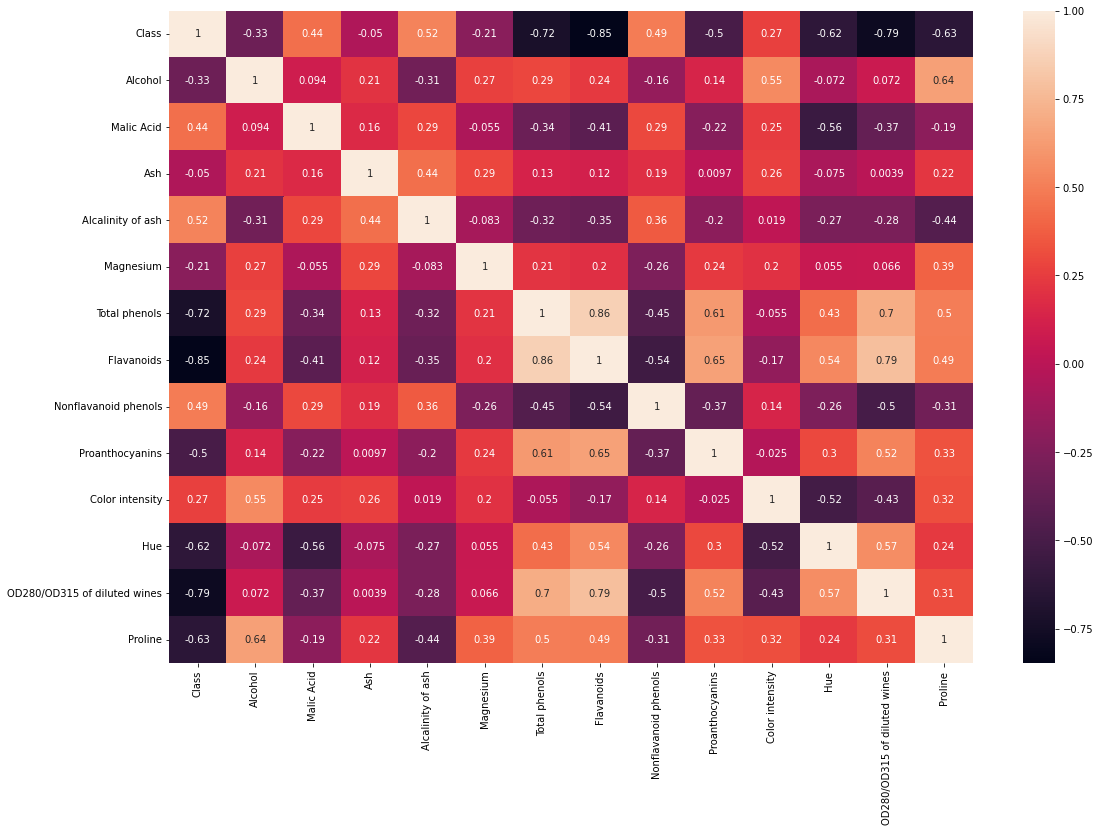

In [11]:
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(),annot = True)

## Splitting the Data for Training and Testing (with keeping Class as target)

In [12]:
X = df.copy()
y = X.pop('Class')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

## Standardizing the Dataset

In [14]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

## a) Logistic Regression Classification

### Making a Logistic Regression Model

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Checking the Logistic Regression Accuracy

In [16]:
model.score(X_test, y_test)

1.0

### Logistic Regression Confusion Matrix

In [17]:
y_pred = model.predict(X_test)
m=confusion_matrix(y_test, y_pred)
m

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

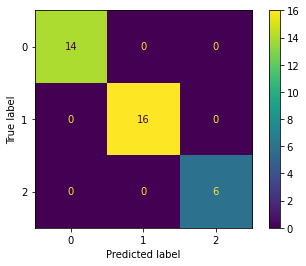

In [25]:
cmd = ConfusionMatrixDisplay(m)
cmd.plot();

## b) Logistic Regression Classification with PCA

### Applying PCA on the Dataset

In [26]:
pca = PCA(n_components = 2)
  
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

### Making a Logistic Regression Model

In [27]:
model = LogisticRegression()
model.fit(X_train1, y_train)

LogisticRegression()

### Checking the Logistic Regression with PCA Accuracy

In [28]:
model.score(X_test1, y_test)

0.9722222222222222

### Logistic Regression with PCA Confusion Matrix

In [29]:
y_pred = model.predict(X_test1)
m=confusion_matrix(y_test, y_pred)
m

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

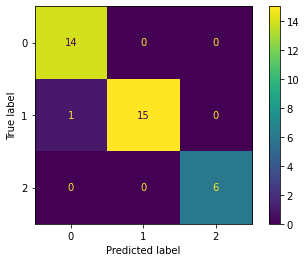

In [30]:
cmd = ConfusionMatrixDisplay(m)
cmd.plot();

## c) Logistion Regression Classification with LDA

### Applying LDA on the Dataset

In [31]:
lda = LDA(n_components=2)
X_train2 = lda.fit_transform(X_train, y_train)
X_test2 = lda.transform(X_test)

### Making a Logistic Regression Model

In [32]:
model = LogisticRegression()
model.fit(X_train2, y_train)

LogisticRegression()

### Chescking the Logistic Regression with LDA Accuracy

In [33]:
model.score(X_test2, y_test)

1.0

### Logistic Regression with LDA Confusion Matrix

In [34]:
y_pred = model.predict(X_test2)
m=confusion_matrix(y_test, y_pred)
m

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

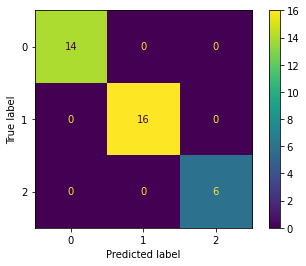

In [35]:
cmd = ConfusionMatrixDisplay(m)
cmd.plot();